# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import Normalizer #SKlearn is the library for machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Clean Code
# Function and Results
## 01 Data import, Features name cleaning and first exploration

In [45]:
def DATA_FRAME_CLEAN(data_frame_input):
    #Print size of dataframe
    print('The size for this data frame is: ', data_frame_input.shape)
    
    #Standarize column names
    cols = [col_name.upper().replace(' ', '_') for col_name in data_frame_input.columns]
    data_frame_input.columns = cols
    
    #Clean Variables
    #Fix weigth
    data_frame_input['WEIGHT'] = data_frame_input['WEIGHT'].str.rstrip('lbs').astype(int)
    #Fix heigth
    data_frame_input['HEIGHT'] = data_frame_input['HEIGHT'].str.replace('\'', '.').str.replace('"', '').astype(float)
    
    data_frame_input['IR'] = data_frame_input['IR'].str.replace('★', '').astype(float)
    data_frame_input['W/F'] = data_frame_input['W/F'].str.replace('★', '').astype(float)
    data_frame_input['SM'] = data_frame_input['SM'].str.replace('★', '').astype(float)
    
    #Fix Money related variables
    ## multiply the numeric values by 1 million or 1 thousand, depending on whether the value represents millions or thousands of euros
    data_frame_input["VALUE"] = data_frame_input["VALUE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
   
    #WAGE
    data_frame_input["WAGE"] = data_frame_input["WAGE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
  
    
    #RELEASE_CLAUSE
    data_frame_input["RELEASE_CLAUSE"] = data_frame_input["RELEASE_CLAUSE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

    
    #Fixed values with a + as a , separator
    cols_to_replace = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK']
    #Some values contains a -
    #data_frame_input[cols_to_replace] = data_frame_input[cols_to_replace].str.replace('-'', '').str.replace('"', '')
    data_frame_input[cols_to_replace] = data_frame_input[cols_to_replace].apply(lambda x: x.str.replace('+', '.'))

    #Convert HITS to numeric
    # Remove the "K" character and convert to numeric
    data_frame_input['HITS'] = pd.to_numeric(data_frame_input['HITS'].str.replace('K', '', regex=False)) * 1000
    data_frame_input['HITS'] = pd.to_numeric(data_frame_input['HITS'])
    
    #Convert ID to string
    data_frame_input['ID'] = data_frame_input['ID'].astype(str)
    
    #Clean nulls
    #Select numeric columns
    df_numeric=data_frame_input.select_dtypes(include=["float", "int64","int32"]) 
    null_columns = df_numeric.columns[df_numeric.isna().sum() != 0].tolist()
    print("\n\n\nNumerical columns that contains null values: \n ",null_columns,"\n\n\n")
    #Put 0 in those which have nulls.
    #for  Column_to_change in null_columns:
        #df_numeric[Column_to_change] = df_numeric[Column_to_change].fillna(0) 
    
    #Select Object Variables
    df_object=data_frame_input.select_dtypes(include=[object]) 
    null_columns = df_object.columns[df_object.isna().sum() != 0].tolist()
    print("Categorical columns that contains null values: \n ",null_columns, "\n nulls have been replaced with Unkown label\n\n\n")
    #Put Unkwon in those which have nulls.
    for  Column_to_change in null_columns:
        df_object[Column_to_change] = df_object[Column_to_change].fillna('Unknown') 
    
    #Merge both branches
    data_frame_input=pd.concat([df_numeric,df_object],axis=1)
    #print(data_frame_input.columns)
    
    #Change EFFECTIVE_TO_DATE to date type
    #data_frame_input['EFFECTIVE_TO_DATE'] = pd.to_datetime(data_frame_input['EFFECTIVE_TO_DATE'])
    
    #Rename columns
    data_frame_input = data_frame_input.rename(columns={'OVA': 'OVERALL', 'BOV': 'BEST_OVERALL','LS': 'LEFT_STRIKER','ST':'LEFT_STRIKER',
                           'RS':'RIGHT_STRIKER','LW':'LEFT_WING','LF':'LEFT_FORWARD','CF':'CENTRAL_FORWARD','RF':'RIGHT_FORWARD',
                            'RW':'RIGHT_WING','LAM':'LEFT_ATTACKING_MIDFIELDER','CAM':'CENTRAL_ATTACKING_MIDFILEDER','RAM':'RIGHT_ATTACKING_MIDFIELDER',
                           'LM':'LEFT_MIDFIELDER','LCM':'LEFT_CENTRAL_MIDFIELDER','CM':'CENTRAL_MIDFIELDER','RCM':'RIGHT_CENTRAL_MIDFIELDER','RM':'RIGHT_MIDFIELDER',
                           'LWB':'LEFT_WING_BACK','LDM':'LEFT_DEFFENSIVE_MIDFIELDER','CDM':'CENTRAL_DEFENSIVE_MIDFIELDER','RDM':'RIGHT_DEFENSIVE_MIDFIELDER',
                           'RWB':'RIGHT_WING_BACK','LB':'LEFT_BACK','LCB':'LEFT_CENTRAL_BACK','CB':'CENTRAL_BACK','RCB':'RIGHT_CENTRAL_BACK','RB':'RIGHT_BACK',
                           'GK':'GOAL_KEEPER','BP':'BEST_POSITION','FK_ACCURACY':'FREE_KICK_ACCURACY','A/W':'ATTACKING_WORK_RATE','D/W':'DEFENSIVE_WORK_RATE','SM':'SKILL_MOVES','W/F':'WEEK_FOOT_ABILITY','SHO':'SHOOTING',
                           'POT':'POTENTIAL'})
    
    #Assign to ouput
    data_frame_output=data_frame_input
    
    #Print info for the dataframe
    print('\n\n\nDescription of output data frame \n')
    data_frame_output.info(
    )
    return data_frame_output

In [46]:
#Here I use the function created to import, clean and show information about this dataframe
data_frame_input = pd.read_csv('./fifa21_male2.csv')
#data_frame_input.shape
df_cleaned=DATA_FRAME_CLEAN(data_frame_input)
df_cleaned.sample(10)

The size for this data frame is:  (17125, 107)



Numerical columns that contains null values: 
  ['VOLLEYS', 'CURVE', 'AGILITY', 'BALANCE', 'JUMPING', 'INTERCEPTIONS', 'POSITIONING', 'VISION', 'COMPOSURE', 'SLIDING_TACKLE', 'HITS'] 



Categorical columns that contains null values: 
  ['CLUB', 'POSITION', 'CLUB_LOGO', 'JOINED', 'LOAN_DATE_END', 'A/W', 'D/W'] 
 nulls have been replaced with Unkown label






Description of output data frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, AGE to GENDER
dtypes: float64(15), int32(4), int64(44), object(44)
memory usage: 13.7+ MB


,AGE,OVERALL,BEST_OVERALL,POTENTIAL,HEIGHT,WEIGHT,GROWTH,VALUE,WAGE,RELEASE_CLAUSE,ATTACKING,CROSSING,FINISHING,HEADING_ACCURACY,SHORT_PASSING,VOLLEYS,SKILL,DRIBBLING,CURVE,FREE_KICK_ACCURACY,LONG_PASSING,BALL_CONTROL,MOVEMENT,ACCELERATION,SPRINT_SPEED,AGILITY,REACTIONS,BALANCE,POWER,SHOT_POWER,JUMPING,STAMINA,STRENGTH,LONG_SHOTS,MENTALITY,AGGRESSION,INTERCEPTIONS,POSITIONING,VISION,PENALTIES,COMPOSURE,DEFENDING,MARKING,STANDING_TACKLE,SLIDING_TACKLE,GOALKEEPING,GK_DIVING,GK_HANDLING,GK_KICKING,GK_POSITIONING,GK_REFLEXES,TOTAL_STATS,BASE_STATS,WEEK_FOOT_ABILITY,SKILL_MOVES,IR,PAC,SHOOTING,PAS,DRI,DEF,PHY,HITS,ID,NAME,NATIONALITY,CLUB,BEST_POSITION,POSITION,PLAYER_PHOTO,CLUB_LOGO,FLAG_PHOTO,TEAM_&_CONTRACT,FOOT,JOINED,LOAN_DATE_END,CONTRACT,ATTACKING_WORK_RATE,DEFENSIVE_WORK_RATE,LEFT_STRIKER,LEFT_STRIKER,RIGHT_STRIKER,LEFT_WING,LEFT_FORWARD,CENTRAL_FORWARD,RIGHT_FORWARD,RIGHT_WING,LEFT_ATTACKING_MIDFIELDER,CENTRAL_ATTACKING_MIDFILEDER,RIGHT_ATTACKING_MIDFIELDER,LEFT_MIDFIELDER,LEFT_CENTRAL_MIDFIELDER,CENTRAL_MIDFIELDER,RIGHT_CENTRAL_MIDFIELDER,RIGHT_MIDFIELDER,LEFT_WING_BACK,LEFT_DEFFENSIVE_MIDFIELDER,CENTRAL_DEFENSIVE_MIDFIELDER,RIGHT_DEFENSIVE_MIDFIELDER,RIGHT_WING_BACK,LEFT_BACK,LEFT_CENTRAL_BACK,CENTRAL_BACK,RIGHT_CENTRAL_BACK,RIGHT_BACK,GOAL_KEEPER,GENDER
12526,27,68,68,69,5.90,132,1,900000,3000,1400000,258,63,44,51,61,39.0,265,64,50.0,39,49,63,374,78,78,76.0,65,77.0,295,59,67.0,73,54,42,279,69,62.0,53.0,51.0,44,59.0,199,67,68,64.0,59,15,13,14,6,11,1729,373,2.0,3.0,1.0,78,47,56,66,64,62,8000.0,242995,J. Mora,Costa Rica,DC United,LB,LB LWB,https://cdn.sofifa.com/players/242/995/20_120.png,https://cdn.sofifa.com/teams/688/light_60.png,https://cdn.sofifa.com/flags/cr.png,DC United 2018 ~ 2020,Left,"Mar 7, 2018",Unknown,2018 ~ 2020,Medium,Medium,57.2,57.2,57.2,61.0,59.0,59.0,59.0,61.0,59.2,59.2,59.2,62.2,58.2,58.2,58.2,62.2,66.2,62.2,62.2,62.2,66.2,66.2,63.2,63.2,63.2,66.2,17.2,Male
4348,29,73,74,73,6.00,161,0,3800000,20000,8400000,316,69,73,49,76,49.0,357,74,65.0,70,73,75,345,71,63,73.0,71,67.0,318,58,58.0,72,58,72,316,45,60.0,75.0,76.0,60,75.0,160,60,59,41.0,47,8,11,14,6,8,1859,398,3.0,3.0,1.0,67,68,73,74,57,59,14000.0,204387,Juan Carlos,Spain,SD Huesca,CAM,CM CAM ST,https://cdn.sofifa.com/players/204/387/20_120.png,https://cdn.sofifa.com/teams/110839/light_60.png,https://cdn.sofifa.com/flags/es.png,SD Huesca 2019 ~ 2021,Right,"Jul 31, 2019",Unknown,2019 ~ 2021,Medium,Medium,68.2,68.2,68.2,73.0,72.0,72.0,72.0,73.0,74.-1,74.-1,74.-1,73.0,73.0,73.0,73.0,73.0,65.2,65.2,65.2,65.2,65.2,62.2,58.2,58.2,58.2,62.2,15.2,Male
4134,27,64,64,64,6.20,187,0,400000,3000,500000,242,42,31,64,70,35.0,223,37,35.0,26,64,61,269,50,45,56.0,64,54.0,280,39,69.0,60,77,35,232,53,55.0,34.0,44.0,46,70.0,196,65,68,63.0,47,10,8,7,14,8,1489,316,3.0,2.0,1.0,47,35,54,48,64,68,4000.0,203224,C. Good,Australia,Melbourne City FC,CB,CB,https://cdn.sofifa.com/players/203/224/20_120.png,https://cdn.sofifa.com/teams/112224/light_60.png,https://cdn.sofifa.com/flags/au.png,Melbourne City FC 2018 ~ 2021,Left,"Sep 18, 2018",Unknown,2018 ~ 2021,Low,Medium,47.2,47.2,47.2,47.0,47.0,47.0,47.0,47.0,50.2,50.2,50.2,50.2,56.2,56.2,56.2,50.2,58.2,63.1,63.1,63.1,58.2,59.2,64.0,64.0,64.0,59.2,16.2,Male
9568,22,57,60,68,5.80,132,11,170000,5000,357000,246,56,49,31,62,48.0,290,62,56.0,51,60,61,304,60,54,72.0,44,74.0,229,54,32.0,55,38,50,257,48,44.0,50.0,66.0,49,62.0,135,46,45,44.0,53,12,12,9,11,9,1514,317,3.0,3.0,1.0,57,50,60,62,44,44,6000.0,232757,K. Scott,United States,Newcastle United,CAM,CM,https://cdn.sofifa.com/players/232/757/20_120.png,https://cdn.sofifa.com/teams/13/light_60.png,https://cdn.sofifa.com/flags/us.png,Newcastle United 2019 ~ 2021,Right,"Jul 29, 2019",Unknown,2019 ~ 2021,Medium,Medium,50.2,50.2,50.2,57.0,56.0,56.0,56.0,57.0,58.2,58.2,58.2,57.2,57.2,57.2,57.2,57.2,52.2,52.2,52.2,52.2,52.2,50.2,44.2,44.2,44.2,50.2,15.2,Male
7682,28,70,70,70,6.00,170,0,1800000,3000,2800000,330,62,73,61,64,70.0,301,70,63.0,41,57,70,384,72,80,80.0,72,80.0,353,69,68.0,85,67,64,297,50,

#      02 Exploration
##     Here I separate numerical and categorical features.
- df_numeric
- df_object

### The next step is to show results for Categorical and Numerical features

In [49]:
df_numeric=df_cleaned.select_dtypes(include=["float", "int64","int32"])
df_object=df_cleaned.select_dtypes(include=[object]) 

In [50]:
df_numeric

,AGE,OVERALL,BEST_OVERALL,POTENTIAL,HEIGHT,WEIGHT,GROWTH,VALUE,WAGE,RELEASE_CLAUSE,ATTACKING,CROSSING,FINISHING,HEADING_ACCURACY,SHORT_PASSING,VOLLEYS,SKILL,DRIBBLING,CURVE,FREE_KICK_ACCURACY,LONG_PASSING,BALL_CONTROL,MOVEMENT,ACCELERATION,SPRINT_SPEED,AGILITY,REACTIONS,BALANCE,POWER,SHOT_POWER,JUMPING,STAMINA,STRENGTH,LONG_SHOTS,MENTALITY,AGGRESSION,INTERCEPTIONS,POSITIONING,VISION,PENALTIES,COMPOSURE,DEFENDING,MARKING,STANDING_TACKLE,SLIDING_TACKLE,GOALKEEPING,GK_DIVING,GK_HANDLING,GK_KICKING,GK_POSITIONING,GK_REFLEXES,TOTAL_STATS,BASE_STATS,WEEK_FOOT_ABILITY,SKILL_MOVES,IR,PAC,SHOOTING,PAS,DRI,DEF,PHY,HITS
0,33,69,71,69,6.00,181,0,625000,7000,0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3.0,2.0,2.0,71,59,70,71,68,69,4000.0
1,37,71,70,71,5.10,143,0,600000,7000,1100000,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4.0,3.0,1.0,53,69,73,69,58,63,4000.0
2,33,71,71,71,5.90,161,0,1100000,15000,0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4.0,4.0,2.0,45,68,76,77,36,52,11000.0
3,36,68,70,82,5.11,165,14,0,0,0,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3.0,1.0,1.0,61,66,66,69,47,60,3000.0
4,36,81,82,81,5.70,150,0,5500000,12000,7200000,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4.0,4.0,4.0,58,70,85,85,63,59,149000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,66,69,6.60,165,5,550000,2000,0,197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61,71,66.0,39,11,8,8,5,7,1367,302,2.0,2.0,1.0,54,30,37,48,64,69,NaN
17121,18,56,58,66,5.10,170,10,130000,3000,273000,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,12,15,7,12,11,1529,319,3.0,2.0,1.0,62,46,57,56,43,55,NaN
17122,18,56,56,67,5.90,154,11,130000,2000,273000,218,55,34,53,42,34.0,212,52,43.0,34,36,47,308,66,61,54.0,59,68.0,233,28,61.0,53,54,37,256,58,55.0,49.0,45.0,49,43.0,163,55,54,54.0,40,8,7,5,12,8,1430,303,3.0,2.0,1.0,63,35,44,52,54,55,NaN
17123,20,62,62,73,5.90,148,11,475000,3000,784000,223,62,26,52,60,23.0,258,55,43.0,46,57,57,349,72,70,74.0,56,77.0,261,51,72.0,57,48,33,257,61,58.0,46.0,56.0,36,54.0,180,57,62,61.0,51,15,13,8,6,9,1579,335,4.0,2.0,1.0,71,34,58,59,59,54,NaN


In [51]:
df_object

,ID,NAME,NATIONALITY,CLUB,BEST_POSITION,POSITION,PLAYER_PHOTO,CLUB_LOGO,FLAG_PHOTO,TEAM_&_CONTRACT,FOOT,JOINED,LOAN_DATE_END,CONTRACT,ATTACKING_WORK_RATE,DEFENSIVE_WORK_RATE,LEFT_STRIKER,LEFT_STRIKER,RIGHT_STRIKER,LEFT_WING,LEFT_FORWARD,CENTRAL_FORWARD,RIGHT_FORWARD,RIGHT_WING,LEFT_ATTACKING_MIDFIELDER,CENTRAL_ATTACKING_MIDFILEDER,RIGHT_ATTACKING_MIDFIELDER,LEFT_MIDFIELDER,LEFT_CENTRAL_MIDFIELDER,CENTRAL_MIDFIELDER,RIGHT_CENTRAL_MIDFIELDER,RIGHT_MIDFIELDER,LEFT_WING_BACK,LEFT_DEFFENSIVE_MIDFIELDER,CENTRAL_DEFENSIVE_MIDFIELDER,RIGHT_DEFENSIVE_MIDFIELDER,RIGHT_WING_BACK,LEFT_BACK,LEFT_CENTRAL_BACK,CENTRAL_BACK,RIGHT_CENTRAL_BACK,RIGHT_BACK,GOAL_KEEPER,GENDER
0,2,G. Pasquale,Italy,Udinese,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,Left,"Jul 1, 2008",Unknown,2008 ~ 2016,Medium,High,65.0,65.0,65.0,68.0,67.0,67.0,67.0,68.0,68.0,68.0,68.0,69.0,69.0,69.0,69.0,69.0,71.-2,70.-1,70.-1,70.-1,71.-2,70.-1,69.0,69.0,69.0,70.-1,17.0,Male
1,16,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,Right,"Jul 19, 2014",Unknown,2014 ~ 2019,Medium,Medium,67.1,67.1,67.1,67.0,68.0,68.0,68.0,67.0,70.1,70.1,70.1,68.1,70.1,70.1,70.1,68.1,62.1,66.1,66.1,66.1,62.1,60.1,60.1,60.1,60.1,60.1,17.1,Male
2,27,J. Cole,England,Coventry City,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,Right,"Jan 7, 2016",Unknown,2016 ~ 2020,Medium,Low,64.0,64.0,64.0,70.0,69.0,69.0,69.0,70.0,71.0,71.0,71.0,68.0,66.0,66.0,66.0,68.0,52.0,54.0,54.0,54.0,52.0,47.0,46.0,46.0,46.0,47.0,15.0,Male
3,36,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,Unknown,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,Right,Unknown,Unknown,2009,Unknown,Unknown,67.0,67.0,67.0,66.0,67.0,67.0,67.0,66.0,70.0,70.0,70.0,66.0,68.0,68.0,68.0,66.0,56.0,65.0,65.0,65.0,56.0,57.0,51.0,51.0,51.0,57.0,22.0,Male
4,41,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,Right,"Jul 16, 2018",Unknown,2018 ~ 2021,High,Medium,72.3,72.3,72.3,79.0,79.0,79.0,79.0,79.0,82.-1,82.-1,82.-1,79.2,81.0,81.0,81.0,79.2,70.3,73.3,73.3,73.3,70.3,67.3,64.3,64.3,64.3,67.3,17.3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,France,CD Tondela,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,https://cdn.sofifa.com/flags/fr.png,"CD Tondela Jun 30, 2021 On Loan",Right,"Sep 29, 2020","Jun 30, 2021","Jun 30, 2021 On Loan",Medium,Medium,43.2,43.2,43.2,41.0,41.0,41.0,41.0,41.0,41.2,41.2,41.2,43.2,44.2,44.2,44.2,43.2,54.2,55.2,55.2,55.2,54.2,57.2,64.2,64.2,64.2,57.2,12.2,Male
17121,259090,W. Rickard,Wales,Burnley,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,Burnley 2020 ~ 2021,Right,"Aug 20, 2020",Unknown,2020 ~ 2021,Medium,Medium,53.2,53.2,53.2,55.0,54.0,54.0,54.0,55.0,56.2,56.2,56.2,56.2,55.2,55.2,55.2,56.2,53.2,52.2,52.2,52.2,53.2,52.2,49.2,49.2,49.2,52.2,17.2,Male
17122,259091,C. Barrett,England,Burnley,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Burnley 2020 ~ 2022,Right,"Aug 20, 2020",Unknown,2020 ~ 2022,Medium,Medium,46.2,46.2,46.2,50.0,47.0,47.0,47.0,50.0,47.2,47.2,47.2,50.2,46.2,46.2,46.2,50.2,54.2,50.2,5

In [14]:
#Check unique values for each categorical value
for column in df_object.columns:
    print("This feature ", column ," has ", df_object[column].nunique(), " categories \n The single values are: ", df_object[column].unique() )
    print("Here the detail: \n" , df_object[column].value_counts())
    print("\n\n")

This feature  ID  has  17125  categories 
 The single values are:  ['2' '16' '27' ... '259091' '259101' '259105']
Here the detail: 
 252139    1
142707    1
234735    1
247135    1
192154    1
         ..
214922    1
236903    1
48717     1
255986    1
251152    1
Name: ID, Length: 17125, dtype: int64



This feature  NAME  has  16176  categories 
 The single values are:  ['G. Pasquale' 'Luis García' 'J. Cole' ... 'C. Barrett' 'J. Gazibegović'
 'Pablo Rodríguez']
Here the detail: 
 J. Rodríguez     10
A. Traoré         8
J. Rojas          8
J. Jones          7
Paulinho          7
                 ..
L. Öztunalı       1
F. Manojlović     1
L. McCullough     1
J. Rask           1
T. O'Sullivan     1
Name: NAME, Length: 16176, dtype: int64



This feature  NATIONALITY  has  167  categories 
 The single values are:  ['Italy' 'Spain' 'England' 'Trinidad &amp; Tobago' 'Germany' 'Turkey'
 'Wales' 'Republic of Ireland' 'Nigeria' 'Brazil' 'Australia' 'Hungary'
 'Argentina' 'Portugal' 'Netherlan

AttributeError: 'DataFrame' object has no attribute 'unique'

# Numerical features

## Histograms

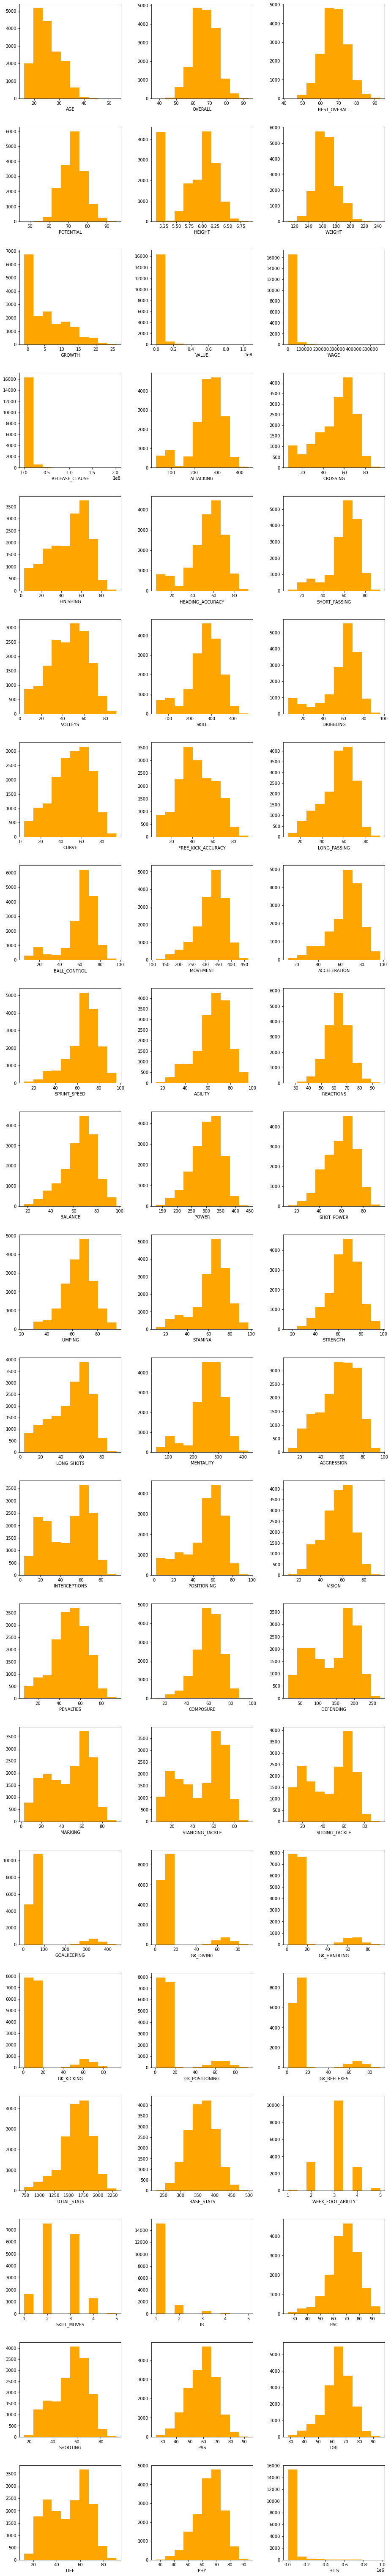

In [52]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each histogram in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    ax.hist(df_numeric[column], color='orange')
    ax.set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

## Distributions
### Histograms

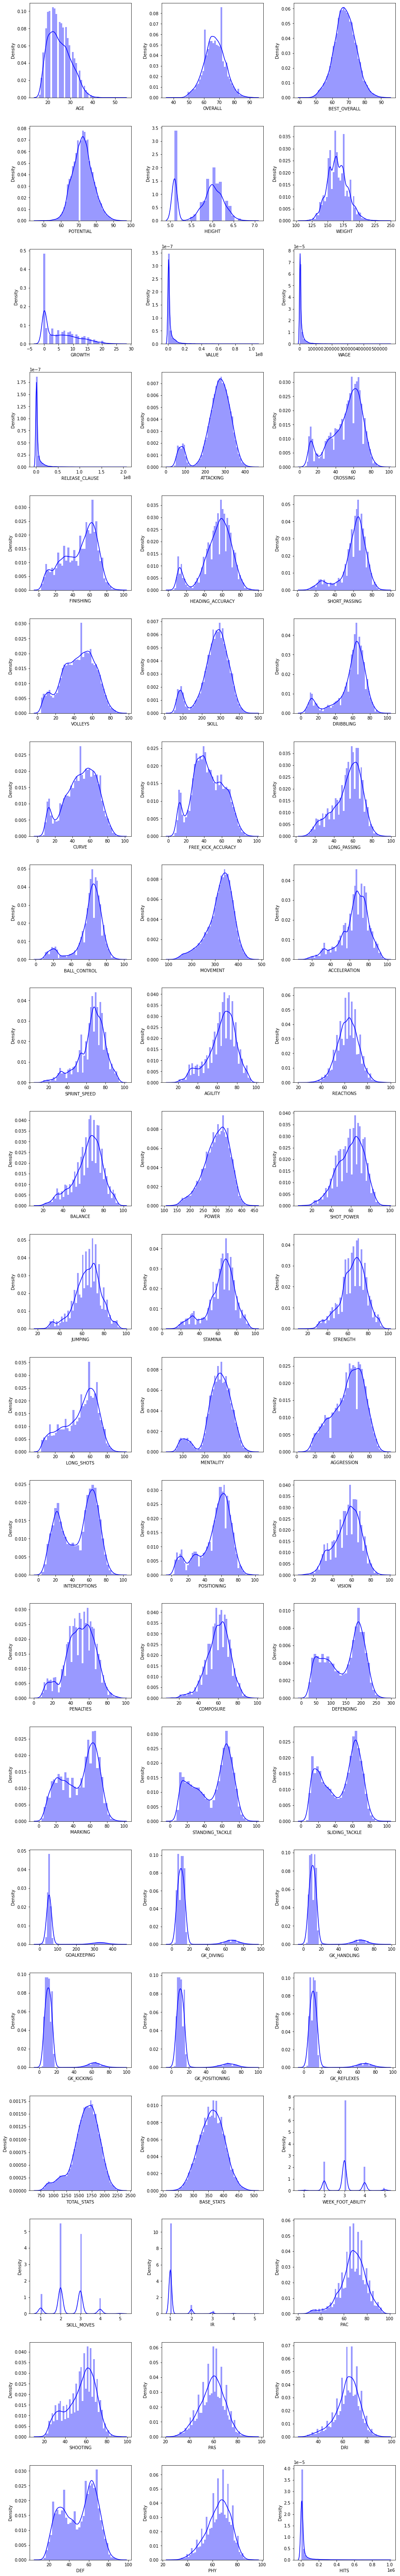

In [54]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(df_numeric[column], ax=axes[row_idx, col_idx], kde=True, color='blue')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

## Boxplots
### Histograms

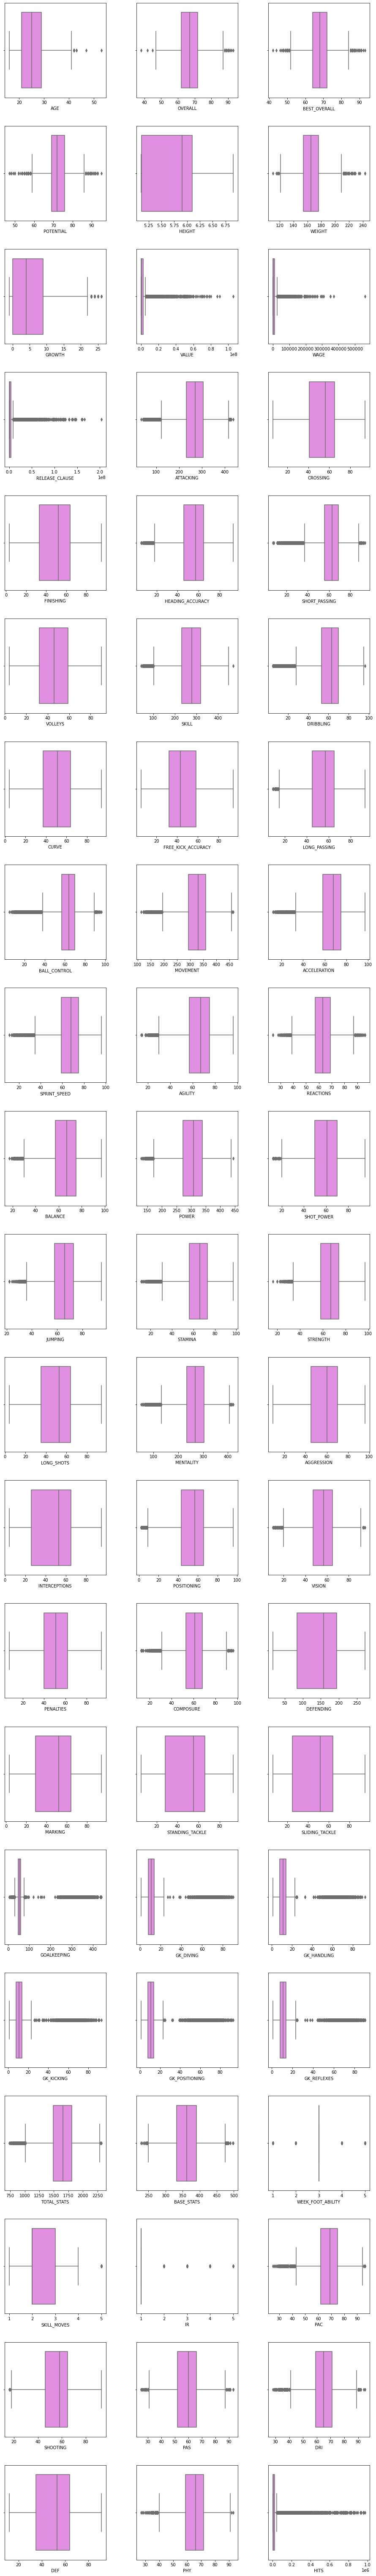

In [55]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.boxplot(x=df_numeric[column], whis=1.5, ax=axes[row_idx, col_idx], color='violet')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

### Details about the limits and the outlyers for each numeric variable

In [56]:
for column in df_numeric.columns:
    iqr = np.percentile(df_numeric[column],75) - np.percentile(df_numeric[column],25) # data['IC1'].quantile(0.75)
    iqr
    # define the limits
    upper_limit = np.percentile(df_numeric[column],75) + 1.5*iqr
    lower_limit = np.percentile(df_numeric[column],25) - 1.5*iqr
    print("\nFeature name: ", column," | Upper limit: ", upper_limit," | Lower limit: ", lower_limit)
    size_exclusion=len(df_numeric.loc[(df_numeric[column]>upper_limit) | (df_numeric[column]<lower_limit)])
    print("Number of exclusions would be ",size_exclusion)
    #print(X_num.where((X_num[X_num[column]]<lower_limit) and (X_num[X_num[column]]>lower_limit)).shape())


Feature name:  AGE  | Upper limit:  41.0  | Lower limit:  9.0
Number of exclusions would be  13

Feature name:  OVERALL  | Upper limit:  87.0  | Lower limit:  47.0
Number of exclusions would be  32

Feature name:  BEST_OVERALL  | Upper limit:  84.0  | Lower limit:  52.0
Number of exclusions would be  251

Feature name:  POTENTIAL  | Upper limit:  86.5  | Lower limit:  58.5
Number of exclusions would be  298

Feature name:  HEIGHT  | Upper limit:  7.584999999999999  | Lower limit:  3.6250000000000013
Number of exclusions would be  0

Feature name:  WEIGHT  | Upper limit:  209.0  | Lower limit:  121.0
Number of exclusions would be  82

Feature name:  GROWTH  | Upper limit:  22.5  | Lower limit:  -13.5
Number of exclusions would be  51

Feature name:  VALUE  | Upper limit:  5437500.0  | Lower limit:  -2662500.0
Number of exclusions would be  2304

Feature name:  WAGE  | Upper limit:  26000.0  | Lower limit:  -14000.0
Number of exclusions would be  1751

Feature name:  RELEASE_CLAUSE  | U

### Correlations


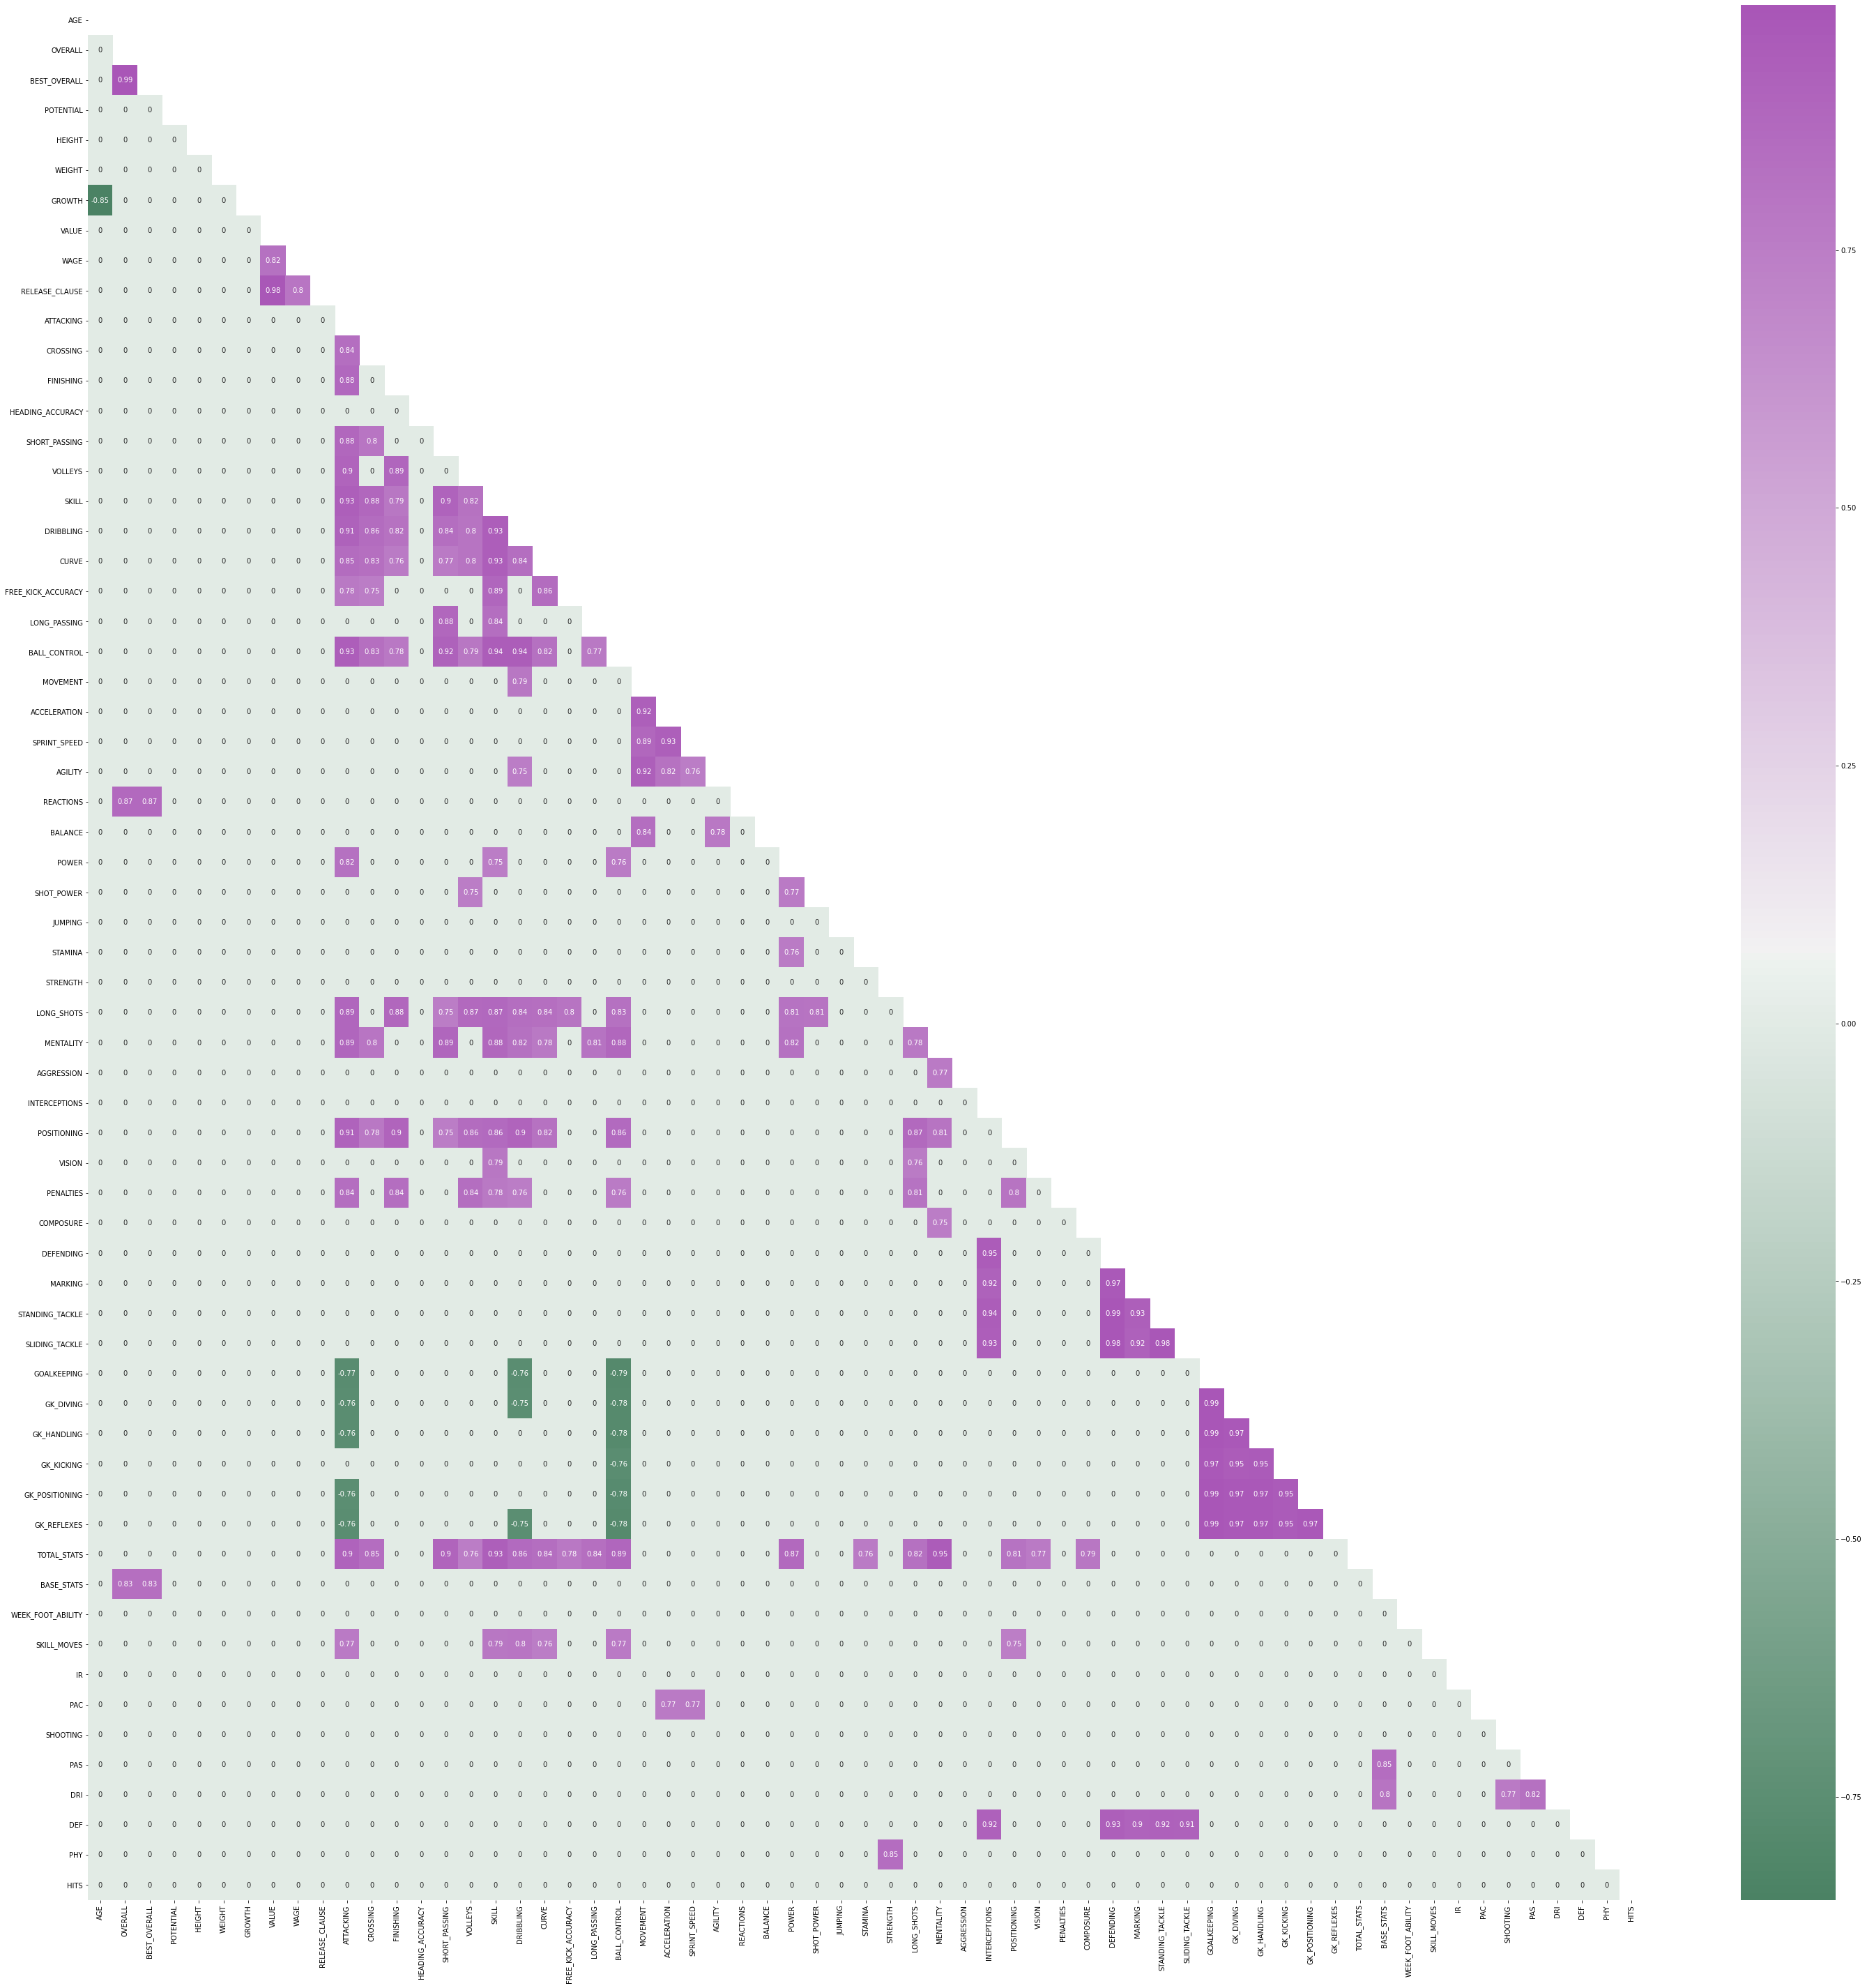

In [57]:
#Check correlation for each feature agaisnt each other
correlations_matrix = df_numeric.corr()
correlations_matrix[(correlations_matrix < 0.75) & (correlations_matrix > -0.75)] = 0
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50, 50))
colormap=sns.diverging_palette(145, 300, s=60, as_cmap=True)
#sns.set(rc={'figure.figsize':(20,15)})
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap=colormap)
plt.show()

## Select variables relevant for the model
### Categoricals
- BEST_POSITION
- FOOT
### Numericals
- AGE
- OVERALL
- VALUE
- POTENTIAL
- HEIGHT
- WEIGHT
- GROWTH

In [58]:
df_object_selected=df_object[['BEST_POSITION','FOOT']]
df_numeric_selected=df_numeric[['AGE','OVERALL','VALUE','POTENTIAL','HEIGHT','WEIGHT', 'GROWTH']]
#df_MODEL=pd.concat([df_object_selected, df_numeric_selected], axis=1)
#df_MODEL.reset_index()
#df_MODEL.shape

## Check unique values in Selected Categorical features
### We don´t want to have so many unique values. Columns are costly. Max 2,3 unique values per feature

In [59]:
#Check unique values for each categorical value
for column in df_object_selected.columns:
    print("This feature ", column ," has ", df_object[column].nunique(), " categories \n The single values are: ", df_object[column].unique() )
    print("Here the detail: \n" , df_object[column].value_counts())
    print("\n\n")

This feature  BEST_POSITION  has  15  categories 
 The single values are:  ['LWB' 'CM' 'CAM' 'ST' 'RW' 'CB' 'CF' 'GK' 'CDM' 'RWB' 'LB' 'LM' 'RM' 'RB'
 'LW']
Here the detail: 
 CB     3252
ST     2660
CAM    2246
GK     1576
RM     1404
CDM    1246
CM      990
LB      921
RB      894
LM      805
RW      329
LWB     252
RWB     252
LW      209
CF       89
Name: BEST_POSITION, dtype: int64



This feature  FOOT  has  2  categories 
 The single values are:  ['Left' 'Right']
Here the detail: 
 Right    12906
Left      4219
Name: FOOT, dtype: int64





## Check values in Selected Numerical features
### We need to test which distribution the variables have and decide the transformation we use. 
### We should remove fetautures with a strong correlation for a linear regression In case of a logaritmit regression we don´t need to transform variables

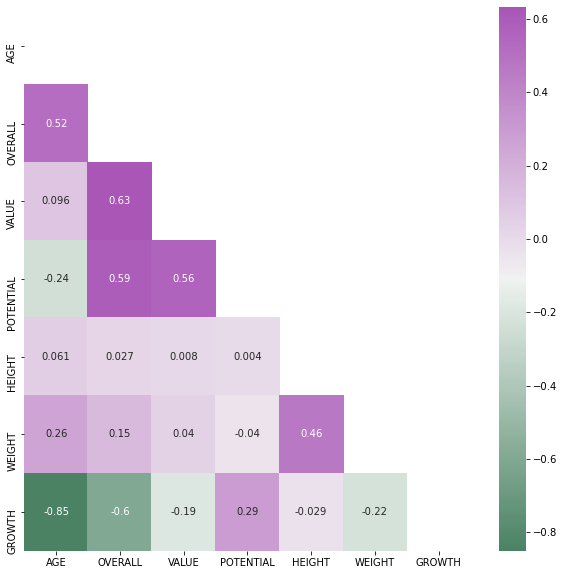

In [60]:
#Check correlation for each feature agaisnt each other
correlations_matrix = df_numeric_selected.corr()
#correlations_matrix[(correlations_matrix < 0.75) & (correlations_matrix > -0.75)] = 0
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 10))
colormap=sns.diverging_palette(145, 300, s=60, as_cmap=True)
#sns.set(rc={'figure.figsize':(20,15)})
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap=colormap)
plt.show()

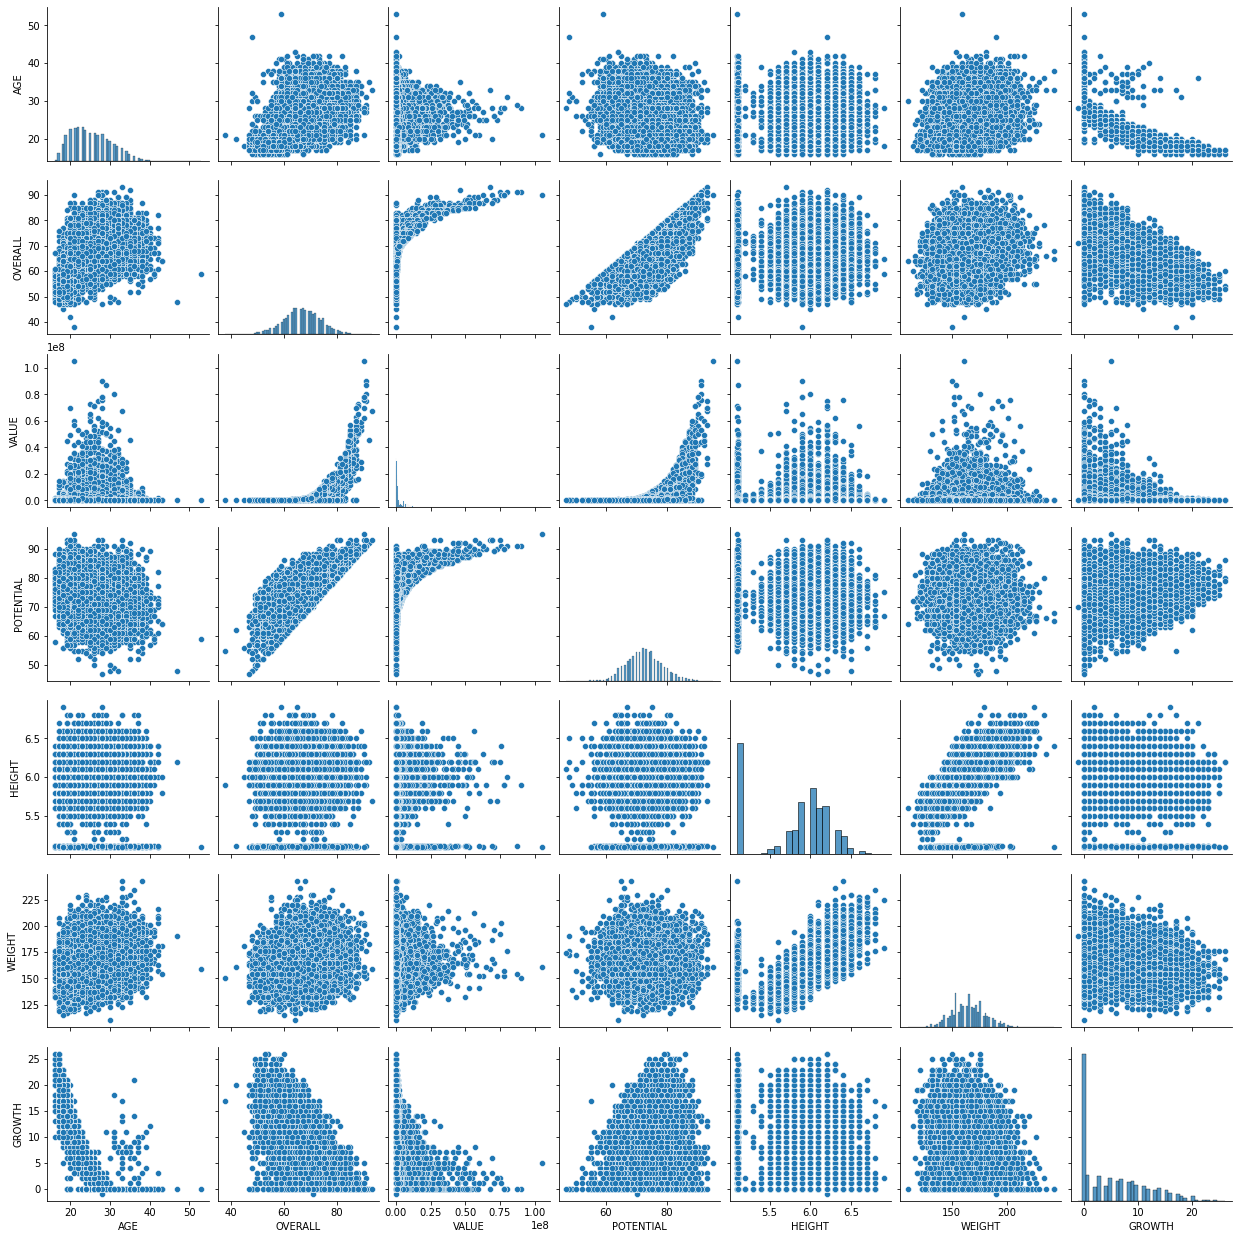

In [61]:
sns.pairplot(df_numeric_selected)

# 03 Process / Transformations
## Encoding
### We Encode the BEST_POSITION feature to keep the most relevant categories. In total they are four

In [62]:
# Create a dictionary that maps old categories to new categories
bp_mapping = {
    "GK": "GOAL KEEPER",
    "ST": "FORWARD",
    "CF": "FORWARD",
    "RW": "FORWARD",
    "LW": "FORWARD",
    "CAM": "MIDFIELD",
    "CM": "MIDFIELD",
    "RM": "MIDFIELD",
    "LM": "MIDFIELD",
    "CDM": "MIDFIELD",
    "CB": "DEFENSIVE",
    "LWB": "DEFENSIVE",
    "RWB": "DEFENSIVE",
    "LB": "DEFENSIVE",
    "RB": "DEFENSIVE",
}
# Use the replace() method to map old categories to new categories
df_object_selected["BEST_POSITION"] = df_object_selected["BEST_POSITION"].replace(bp_mapping)
#df_object_selected.head()
df_object_selected["BEST_POSITION"].unique()

array(['DEFENSIVE', 'MIDFIELD', 'FORWARD', 'GOAL KEEPER'], dtype=object)

In [63]:
df_object_encoded = pd.get_dummies(df_object_selected, drop_first=False)
df_object_encoded.sample(5)

,BEST_POSITION_DEFENSIVE,BEST_POSITION_FORWARD,BEST_POSITION_GOAL KEEPER,BEST_POSITION_MIDFIELD,FOOT_Left,FOOT_Right
14557,0,0,0,1,0,1
8795,0,0,0,1,1,0
7479,0,1,0,0,0,1
7289,0,0,0,1,0,1
16070,1,0,0,0,0,1


## Scaler
### The distributions and the outliers for the selected variables are plotted here. This helps us to decide if we need a normalization or a standarization

In [64]:
#I split VALUEt and the rest of numerical values to apply the scalers
X_Target=df_numeric_selected['VALUE']
df_numeric_Transformed=df_numeric_selected.drop(columns='VALUE')
df_numeric_Transformed.sample(4)

,AGE,OVERALL,POTENTIAL,HEIGHT,WEIGHT,GROWTH
16374,18,56,69,6.1,176,13
10908,21,64,77,6.2,176,13
16412,18,53,72,6.3,181,19
13440,23,64,75,6.1,172,11


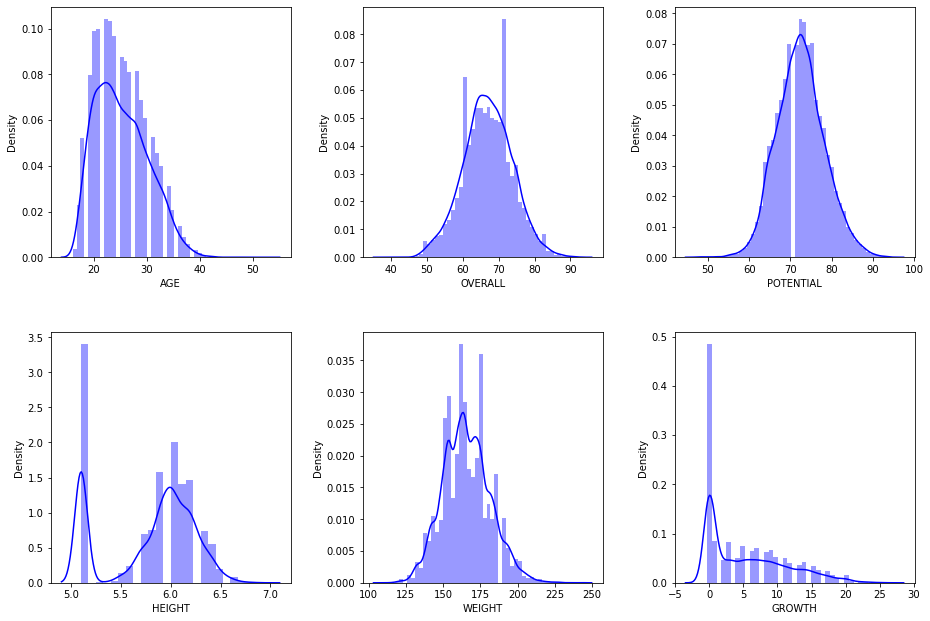

In [66]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric_Transformed.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric_Transformed.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(df_numeric_Transformed[column], ax=axes[row_idx, col_idx], kde=True, color='blue')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

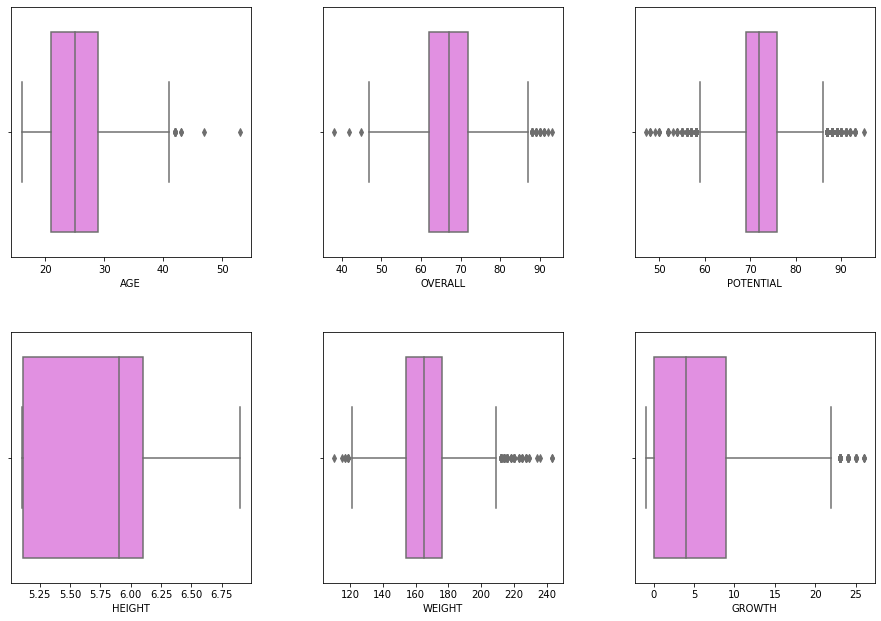

In [67]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric_Transformed.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric_Transformed.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.boxplot(x=df_numeric_Transformed[column], whis=1.5, ax=axes[row_idx, col_idx], color='violet')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

In [68]:
for column in df_numeric_Transformed.columns:
    iqr = np.percentile(df_numeric_Transformed[column],75) - np.percentile(df_numeric[column],25) # data['IC1'].quantile(0.75)
    iqr
    # define the limits
    upper_limit = np.percentile(df_numeric_Transformed[column],75) + 1.5*iqr
    lower_limit = np.percentile(df_numeric_Transformed[column],25) - 1.5*iqr
    print("\nFeature name: ", column," | Upper limit: ", upper_limit," | Lower limit: ", lower_limit)
    size_exclusion=len(df_numeric_Transformed.loc[(df_numeric[column]>upper_limit) | (df_numeric[column]<lower_limit)])
    print("Number of exclusions would be ",size_exclusion)
    #print(X_num.where((X_num[X_num[column]]<lower_limit) and (X_num[X_num[column]]>lower_limit)).shape())


Feature name:  AGE  | Upper limit:  41.0  | Lower limit:  9.0
Number of exclusions would be  13

Feature name:  OVERALL  | Upper limit:  87.0  | Lower limit:  47.0
Number of exclusions would be  32

Feature name:  POTENTIAL  | Upper limit:  86.5  | Lower limit:  58.5
Number of exclusions would be  298

Feature name:  HEIGHT  | Upper limit:  7.584999999999999  | Lower limit:  3.6250000000000013
Number of exclusions would be  0

Feature name:  WEIGHT  | Upper limit:  209.0  | Lower limit:  121.0
Number of exclusions would be  82

Feature name:  GROWTH  | Upper limit:  22.5  | Lower limit:  -13.5
Number of exclusions would be  51


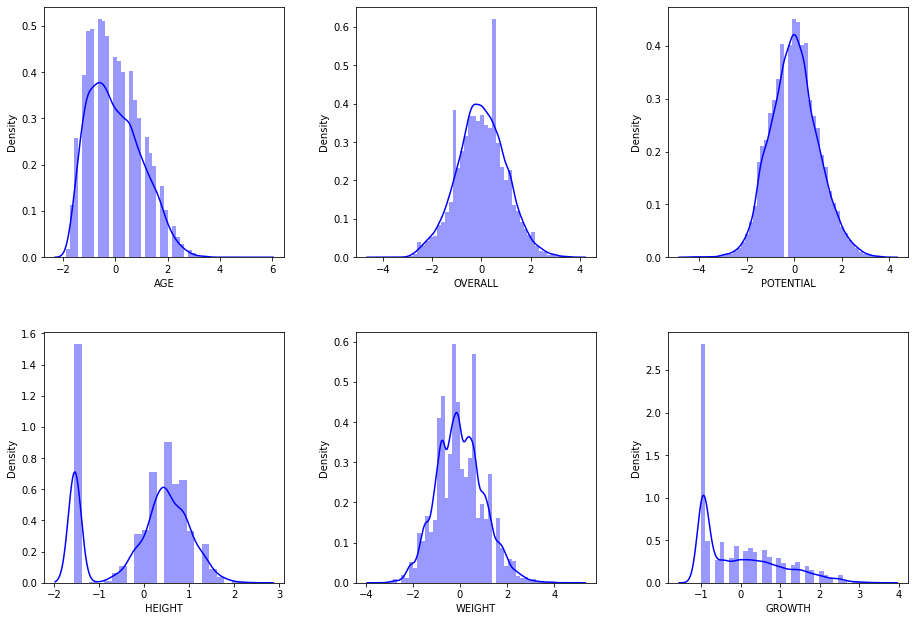

In [69]:
#Show the distributions in as a Standarized distribution. 
##There are different methods to do this transformation
#I use Standarization Standar_scaler to put the mean in 0

transformer = StandardScaler().fit(df_numeric_Transformed)
df_numeric_Transformed_2 = transformer.transform(df_numeric_Transformed)
df_numeric_Transformed = pd.DataFrame(df_numeric_Transformed_2, columns=df_numeric_Transformed.columns)

# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric_Transformed.columns) + num_cols - 1) // num_cols  # number of rows in the grid


# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric_Transformed.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(df_numeric_Transformed[column], ax=axes[row_idx, col_idx], kde=True, color='blue')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

In [70]:
df_numeric_Transformed.sample(5)

,AGE,OVERALL,POTENTIAL,HEIGHT,WEIGHT,GROWTH
7738,-0.257548,0.005096,0.088424,-1.527245,-0.294534,0.082112
1875,1.158734,0.442151,-0.431526,0.670858,1.665293,-0.954629
12854,-1.471503,-1.451753,0.261741,0.670858,0.969870,1.982803
4754,0.754082,0.005096,-0.951476,0.892889,-0.420975,-0.954629
3820,0.551756,0.296466,-0.604843,-1.549448,-0.547415,-0.954629


## 04 Train the model
### Finally we create the dataframe to test the model

### We have two dataframes:

- Target or Y
- Variables or X

In [71]:
Y=X_Target
X=pd.concat([df_numeric_Transformed, df_object_encoded], axis=1)
X.reset_index()
print(X.shape,Y.shape)

(17125, 12) (17125,)


In [72]:
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## 05 Model Validations and Vizs


In [73]:
#Test model
predictions  = model.predict(X_test)
predictions.shape

(5138,)

In [74]:
# evaluating sklearn's LR model
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.4599701815953996
RMSE =  3644193.5863867025
MSE =  13280146895061.979


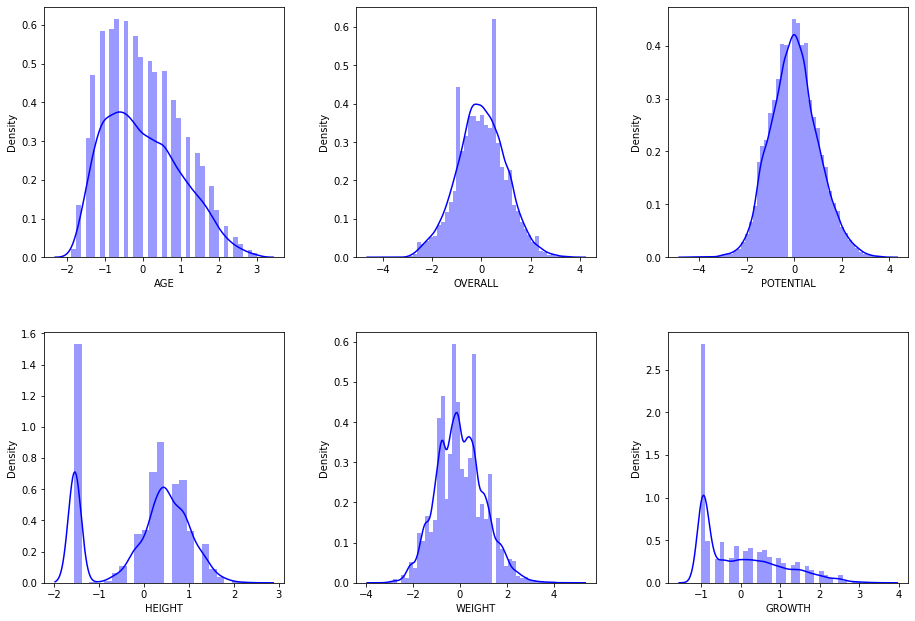

(17125, 12) (17104,)


In [75]:
df_object_selected=df_object[['BEST_POSITION','FOOT']]
df_numeric_selected=df_numeric[['AGE','OVERALL','VALUE','POTENTIAL','HEIGHT','WEIGHT', 'GROWTH']]
df_MODEL=pd.concat([df_object_selected, df_numeric_selected], axis=1)
df_MODEL.reset_index()
df_MODEL.shape

#Try removing the players with AGE in as outliers
# remove them from the data
iqr = np.percentile(df_MODEL['AGE'],75) - np.percentile(df_MODEL['AGE'],25) # data['IC1'].quantile(0.75)
iqr
# define the limits
upper_limit = np.percentile(df_MODEL['AGE'],75) + 1.5*iqr
lower_limit = np.percentile(df_MODEL['AGE'],25) - 1.5*iqr
df_MODEL = df_MODEL[(df_numeric['AGE']>lower_limit) & (df_MODEL['AGE']<upper_limit)]


df_object_selected=df_MODEL[['BEST_POSITION','FOOT']]
df_numeric_selected=df_MODEL[['AGE','OVERALL','VALUE','POTENTIAL','HEIGHT','WEIGHT', 'GROWTH']]

#I split VALUEt and the rest of numerical values to apply the scalers
X_Target=df_numeric_selected['VALUE']
df_numeric_Transformed=df_numeric_selected.drop(columns='VALUE')
df_numeric_Transformed.sample(4)

#Show the distributions in as a Standarized distribution. 
##There are different methods to do this transformation
#I use Standarization Standar_scaler to put the mean in 0

transformer = StandardScaler().fit(df_numeric_Transformed)
df_numeric_Transformed_2 = transformer.transform(df_numeric_Transformed)
df_numeric_Transformed = pd.DataFrame(df_numeric_Transformed_2, columns=df_numeric_Transformed.columns)

# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric_Transformed.columns) + num_cols - 1) // num_cols  # number of rows in the grid


# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric_Transformed.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(df_numeric_Transformed[column], ax=axes[row_idx, col_idx], kde=True, color='blue')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

# Use the replace() method to map old categories to new categories
df_object_selected["BEST_POSITION"] = df_object_selected["BEST_POSITION"].replace(bp_mapping)
#df_object_selected.head()
df_object_selected["BEST_POSITION"].unique()
df_object_encoded = pd.get_dummies(df_object_selected, drop_first=False)
df_object_encoded.sample(5)

Y=X_Target
X=pd.concat([df_numeric_Transformed, df_object_encoded], axis=1)
X.reset_index()
print(X.shape,Y.shape)


In [76]:
Y=X_Target
X=pd.concat([df_numeric_Transformed, df_object_encoded], axis=1)
X.reset_index()
print(X.shape,Y.shape)
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

(17125, 12) (17104,)


ValueError: Found input variables with inconsistent numbers of samples: [17125, 17104]